## Exercício Base dos Dados (Penn World Table) - Luiz Mario

In [1]:
# instalando a API da Base dos Dados 
!pip install basedosdados==1.6.5b3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 4.4 MB/s 
     |████████████████████████████████| 108 kB 13.2 MB/s 
     |████████████████████████████████| 70 kB 10.5 MB/s 
     |████████████████████████████████| 203 kB 54.9 MB/s 
     |████████████████████████████████| 105 kB 49.3 MB/s 
     |████████████████████████████████| 270 kB 44.1 MB/s 
     |████████████████████████████████| 1.1 MB 43.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 133 kB 53.2 MB/s 
     |████████████████████████████████| 97 kB 9.5 MB/s 
     |████████████████████████████████| 58 kB 8.2 MB/s 
     |████████████████████████████████| 5.3 MB 37.1 MB/s 
     |████████████████████████████████| 3.7 MB 57.5 MB/s 
     |████████████████████████████████| 25.5 MB 1.3 MB/s 
     |██████████████████████

In [1]:
# Importando as bibliotecas necessárias 
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import stats
import statsmodels.api as sm
import basedosdados as bd
import pandas as pd

In [2]:
# Configurando o gráfico para ele ter alta definição 
plt.rcParams['figure.dpi'] = 100

In [3]:
#Carregando a base da PWT
data_set_pwt = bd.read_table(dataset_id='nl_ug_pwt',
table_id='microdados',
billing_project_id="penn-world-table-bd")

Downloading: 100%|██████████| 12810/12810 [00:08<00:00, 1547.70rows/s]


In [3]:
#Vizualizadno o nosso dataset
data_set_pwt

,year,country_id_iso_3,country,currency_unit,population,employees,real_gdp_expenditures,real_gdp_output,current_consumption,current_absorption,...,indicator_real_rate_return,indicator_stat_capacity,corr_exp_share,current_share_household,current_share_gcf,current_share_gov,current_share_x,current_share_m,current_share_residual_trade,current_share_labour_gdp_na
0,1950,ABW,Aruba,Aruban Guilder,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1951,ABW,Aruba,Aruban Guilder,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1952,ABW,Aruba,Aruban Guilder,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1953,ABW,Aruba,Aruban Guilder,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954,ABW,Aruba,Aruban Guilder,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12805,2015,ZWE,Zimbabwe,US Dollar,13814629.0,6.393752e+06,4.014162e+10,3.979864e+10,4.424936e+10,4.732546e+10,...,Regular,62.222200,0.306506,0.945086,0.077963,0.176403,0.140172,-0.287693,-0.051930,0.533381
12806,2016,ZWE,Zimbabwe,US Dollar,14030331.0,6.504374e+06,4.187520e+10,4.096319e+10,4.329157e+10,4.640416e+10,...,Regular,55.555533,0.302841,0.890514,0.076169,0.168887,0.131920,-0.251232,-0.016258,0.533381
12807,2017,ZWE,Zimbabwe,US Dollar,14236595.0,6.611773e+06,4.467218e+10,4.431674e+10,4.611395e+10,4.945757e+10,...,Regular,59.999967,0.301868,0.833453,0.075448,0.207101,0.126722,-0.202827,-0.039897,0.533381
12808,2018,ZWE,Zimbabwe,US Dollar,14438802.0,6.714952e+06,4.432511e+10,4.342090e+10,4.619844e+10,4.966539e+10,...,Regular,59.999967,NaN,0.790588,0.079576,0.269799,0.144485,-0.263658,-0.020791,0.533381


## Para iniciar a nossa vizualização iremos tentar reproduzir usando a biblioteca matplotlib o seguinte gráfico feito pela revista The Economist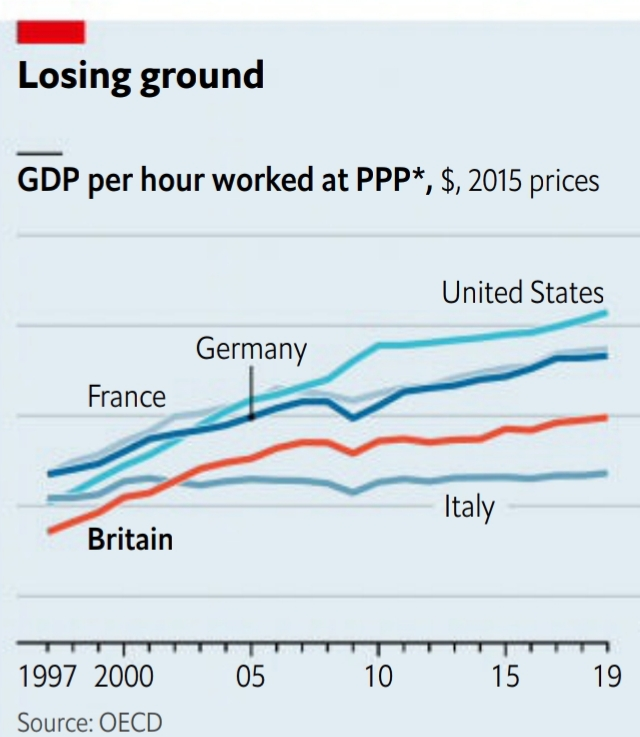


# Define-se Produtividade basicamente como o PIB por Hora trabalhada de um país, a produtividade é um fator crucial para a análise de desenvolvimento e crescimento de um país. Já que ela esta contabilizada em diversos modelos, como o Modelo de Solow que leva em conta a produtivadade total dos fatores. 

In [ ]:
# Filtrando nosso dataframe para os países primeiramente 
#Criando uma lista para filtragem com os simbolos de cada país do gráfico 
paises = ['GBR','DEU','FRA','USA','ITA']
data_set_pwt_produtividade = data_set_pwt[(data_set_pwt.country_id_iso_3.isin(paises))]

In [ ]:
#Vizualizando 
data_set_pwt_produtividade

,year,country_id_iso_3,country,currency_unit,population,employees,real_gdp_expenditures,real_gdp_output,current_consumption,current_absorption,...,indicator_real_rate_return,indicator_stat_capacity,corr_exp_share,current_share_household,current_share_gcf,current_share_gov,current_share_x,current_share_m,current_share_residual_trade,current_share_labour_gdp_na
3220,1950,DEU,Germany,Euro,6.873410e+07,3.085581e+07,3.522692e+11,3.593018e+11,2.508984e+11,3.774294e+11,...,Regular,NaN,NaN,0.558822,0.353441,0.142016,0.083749,-0.091479,-0.046549,0.668121
3221,1951,DEU,Germany,Euro,6.907387e+07,3.143651e+07,3.866059e+11,3.976374e+11,2.691022e+11,4.077873e+11,...,Regular,NaN,NaN,0.531363,0.346923,0.141800,0.101772,-0.084848,-0.037009,0.668121
3222,1952,DEU,Germany,Euro,6.944882e+07,3.202428e+07,4.273346e+11,4.342062e+11,2.906898e+11,4.516431e+11,...,Regular,NaN,NaN,0.515016,0.366025,0.146044,0.097071,-0.087409,-0.036747,0.668121
3223,1953,DEU,Germany,Euro,6.984689e+07,3.283585e+07,4.668727e+11,4.715462e+11,3.211047e+11,4.857487e+11,...,Regular,NaN,NaN,0.529776,0.344275,0.141662,0.104019,-0.089070,-0.030662,0.668121
3224,1954,DEU,Germany,Euro,7.026407e+07,3.383582e+07,5.060561e+11,5.123882e+11,3.395156e+11,5.251916e+11,...,Regular,NaN,NaN,0.519700,0.358909,0.136578,0.118000,-0.102506,-0.030681,0.668121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,2015,USA,United States,US Dollar,3.208783e+08,1.502485e+08,1.890512e+13,1.878536e+13,1.519205e+13,1.947383e+13,...,Regular,NaN,1.0,0.697479,0.228047,0.111648,0.119109,-0.171910,0.015626,0.595646
12176,2016,USA,United States,US Dollar,3.230160e+08,1.523970e+08,1.928525e+13,1.909520e+13,1.560235e+13,1.976734e+13,...,Regular,NaN,1.0,0.703245,0.218102,0.113779,0.113846,-0.164109,0.015137,0.593773
12177,2017,USA,United States,US Dollar,3.250848e+08,1.546723e+08,1.975475e+13,1.954298e+13,1.601979e+13,2.031631e+13,...,Regular,NaN,1.0,0.704093,0.219850,0.115628,0.115603,-0.170726,0.015552,0.596151
12178,2018,USA,United States,US Dollar,3.270963e+08,1.566759e+08,2.036944e+13,2.015526e+13,1.643456e+13,2.093440e+13,...,Regular,NaN,NaN,0.701681,0.223556,0.114803,0.117129,-0.173503,0.016334,0.594326


In [ ]:
# Como o nosso gráfico só contabiliza os anos de 1997 para frente, iremos filtrar agora por ano 
data_set_pwt_produtividade = data_set_pwt_produtividade[(data_set_pwt_produtividade.year >= 1997)]

In [ ]:
data_set_pwt_produtividade

,year,country_id_iso_3,country,currency_unit,population,employees,real_gdp_expenditures,real_gdp_output,current_consumption,current_absorption,...,indicator_real_rate_return,indicator_stat_capacity,corr_exp_share,current_share_household,current_share_gcf,current_share_gov,current_share_x,current_share_m,current_share_residual_trade,current_share_labour_gdp_na
3267,1997,DEU,Germany,Euro,81399251.0,3.777033e+07,2.772802e+12,2.767330e+12,2.023627e+12,2.694886e+12,...,Regular,NaN,NaN,0.608957,0.248390,0.139860,0.346085,-0.343292,2.105190e-16,0.646557
3268,1998,DEU,Germany,Euro,81402673.0,3.821793e+07,2.898376e+12,2.862586e+12,2.100451e+12,2.798904e+12,...,Regular,NaN,NaN,0.599668,0.245986,0.140083,0.371779,-0.357516,0.000000e+00,0.639817
3269,1999,DEU,Germany,Euro,81389927.0,3.880725e+07,3.013046e+12,2.978213e+12,2.226664e+12,2.936329e+12,...,Regular,NaN,NaN,0.609285,0.239978,0.143678,0.361412,-0.354353,0.000000e+00,0.645175
3270,2000,DEU,Germany,Euro,81400882.0,3.960312e+07,3.030253e+12,3.035472e+12,2.240533e+12,2.974364e+12,...,Regular,NaN,NaN,0.596008,0.242488,0.144355,0.384341,-0.367193,1.198216e-16,0.654206
3271,2001,DEU,Germany,Euro,81453885.0,3.945144e+07,3.063526e+12,3.076616e+12,2.280025e+12,2.976507e+12,...,Regular,NaN,NaN,0.593359,0.226319,0.147525,0.400328,-0.367531,0.000000e+00,0.641213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,2015,USA,United States,US Dollar,320878310.0,1.502485e+08,1.890512e+13,1.878536e+13,1.519205e+13,1.947383e+13,...,Regular,NaN,1.0,0.697479,0.228047,0.111648,0.119109,-0.171910,1.562645e-02,0.595646
12176,2016,USA,United States,US Dollar,323015995.0,1.523970e+08,1.928525e+13,1.909520e+13,1.560235e+13,1.976734e+13,...,Regular,NaN,1.0,0.703245,0.218102,0.113779,0.113846,-0.164109,1.513720e-02,0.593773
12177,2017,USA,United States,US Dollar,325084756.0,1.546723e+08,1.975475e+13,1.954298e+13,1.601979e+13,2.031631e+13,...,Regular,NaN,1.0,0.704093,0.219850,0.115628,0.115603,-0.170726,1.555223e-02,0.596151
12178,2018,USA,United States,US Dollar,327096265.0,1.566759e+08,2.036944e+13,2.015526e+13,1.643456e+13,2.093440e+13,...,Regular,NaN,NaN,0.701681,0.223556,0.114803,0.117129,-0.173503,1.633380e-02,0.594326


In [ ]:
#Identificando as colunas do dataframe para filtrarmos depois somente para ficarmos com as necessárias 
for coluna_nome in data_set_pwt_produtividade.columns: 
    print(coluna_nome)

year
country_id_iso_3
country
currency_unit
population
employees
real_gdp_expenditures
real_gdp_output
current_consumption
current_absorption
current_gdp_expenditures
current_gdp_output
current_capital_stock
real_gdp_na
real_consumption_na
real_absorption_na
real_capital_stock_na
average_hours_worked
average_depreciation
current_capital_level
current_tfp_level
current_wtfp_level
real_capital_level_na
real_tfp_level_na
real_wtfp_level_na
price_level_ccon
price_level_cda
price_level_cgdpo
price_level_household
price_level_cf
price_level_gov
price_level_x
price_level_m
price_level_capital_stock
price_level_capital
real_rate_return
exchange_rate
human_capital_index
indicator_cig
indicator_xm
indicator_exchange_rate
indicator_outlier
indicator_real_rate_return
indicator_stat_capacity
corr_exp_share
current_share_household
current_share_gcf
current_share_gov
current_share_x
current_share_m
current_share_residual_trade
current_share_labour_gdp_na


In [ ]:
#Dessas colunas acima iremos só precisar de year ,country_id_iso_3,real_gdp_output, average_hours_worked e employees
# Filtrando o dataframe 
data_set_pwt_produtividade.drop(data_set_pwt_produtividade.columns.difference(['year','country_id_iso_3','real_gdp_output','average_hours_worked','employees']), 1, inplace=True)

In [ ]:
#Vizualizando o dataset
data_set_pwt_produtividade

,year,country_id_iso_3,employees,real_gdp_output,average_hours_worked
3267,1997,DEU,3.777033e+07,2.767330e+12,1507.676130
3268,1998,DEU,3.821793e+07,2.862586e+12,1504.559034
3269,1999,DEU,3.880725e+07,2.978213e+12,1491.513292
3270,2000,DEU,3.960312e+07,3.035472e+12,1465.937805
3271,2001,DEU,3.945144e+07,3.076616e+12,1458.165032
...,...,...,...,...,...
12175,2015,USA,1.502485e+08,1.878536e+13,1770.023174
12176,2016,USA,1.523970e+08,1.909520e+13,1766.744125
12177,2017,USA,1.546723e+08,1.954298e+13,1763.726676
12178,2018,USA,1.566759e+08,2.015526e+13,1774.703811


In [ ]:
# Calculando a produtividade de cada país em cada ano 
data_set_pwt_produtividade['Produtividade'] = data_set_pwt_produtividade['real_gdp_output']/(data_set_pwt_produtividade['employees']*data_set_pwt_produtividade['average_hours_worked'])
data_set_pwt_produtividade

,index,year,country_id_iso_3,employees,real_gdp_output,average_hours_worked,Produtividade
0,3267,1997-01-01,DEU,3.777033e+07,2.767330e+12,1507.676130,48.596166
1,3268,1998-01-01,DEU,3.821793e+07,2.862586e+12,1504.559034,49.783125
2,3269,1999-01-01,DEU,3.880725e+07,2.978213e+12,1491.513292,51.453593
3,3270,2000-01-01,DEU,3.960312e+07,3.035472e+12,1465.937805,52.285504
4,3271,2001-01-01,DEU,3.945144e+07,3.076616e+12,1458.165032,53.481523
...,...,...,...,...,...,...,...
110,12175,2015-01-01,USA,1.502485e+08,1.878536e+13,1770.023174,70.636708
111,12176,2016-01-01,USA,1.523970e+08,1.909520e+13,1766.744125,70.920889
112,12177,2017-01-01,USA,1.546723e+08,1.954298e+13,1763.726676,71.638571
113,12178,2018-01-01,USA,1.566759e+08,2.015526e+13,1774.703811,72.487032


In [ ]:
# Transformando nossos data sets em séries temporais 
data_set_pwt_produtividade['year'] = pd.to_datetime(data_set_pwt_produtividade['year'], format='%Y')

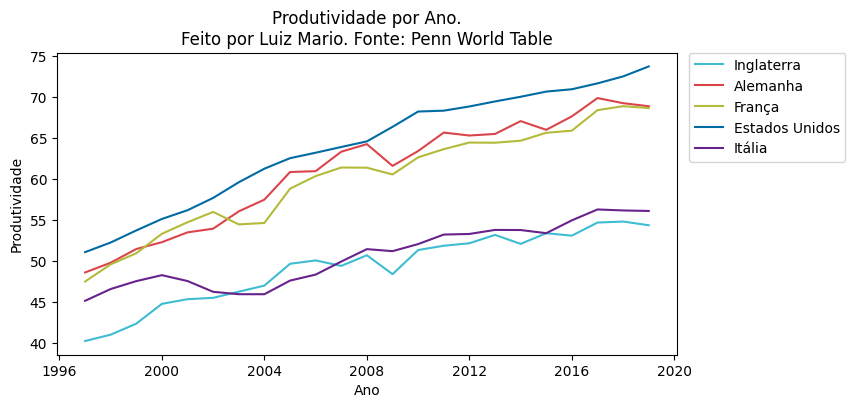

In [ ]:
# Plotando o gráfico 
fig, ax = plt.subplots(figsize=(8,4))
# chamando a nossa lista de paises 
paises = ['GBR','DEU','FRA','USA','ITA']
for pais in paises:
  if pais == 'USA':
    ax.plot(data_set_pwt_produtividade[data_set_pwt_produtividade['country_id_iso_3'] == pais]['year'],
          data_set_pwt_produtividade[data_set_pwt_produtividade['country_id_iso_3'] == pais]['Produtividade'],
          color = '#006BA2',
          label = 'Estados Unidos') #Azul
  elif pais == 'DEU':
    ax.plot(data_set_pwt_produtividade[data_set_pwt_produtividade['country_id_iso_3'] == pais]['year'],
          data_set_pwt_produtividade[data_set_pwt_produtividade['country_id_iso_3'] == pais]['Produtividade'],
          color = '#DB444B',
          label = 'Alemanha') #Vermelho
  elif pais == 'FRA':
     ax.plot(data_set_pwt_produtividade[data_set_pwt_produtividade['country_id_iso_3'] == pais]['year'],
          data_set_pwt_produtividade[data_set_pwt_produtividade['country_id_iso_3'] == pais]['Produtividade'],
          color = '#B4BA39',
          label = 'França') #Oliva
  elif pais == 'ITA':
    ax.plot(data_set_pwt_produtividade[data_set_pwt_produtividade['country_id_iso_3'] == pais]['year'],
          data_set_pwt_produtividade[data_set_pwt_produtividade['country_id_iso_3'] == pais]['Produtividade'],
          color = '#68228B',
          label = 'Itália') #Roxo
  elif pais == 'GBR':
    ax.plot(data_set_pwt_produtividade[data_set_pwt_produtividade['country_id_iso_3'] == pais]['year'],
          data_set_pwt_produtividade[data_set_pwt_produtividade['country_id_iso_3'] == pais]['Produtividade'],
          color = '#3EBCD2',
          label = 'Inglaterra') #Ciano
plt.ticklabel_format(style='plain', axis='y')
ax.set_ylabel("Produtividade")
ax.set_xlabel("Ano")
plt.legend(loc = 'upper left', borderaxespad = 0,bbox_to_anchor=(1.02, 1))
plt.title("Produtividade por Ano.\nFeito por Luiz Mario. Fonte: Penn World Table", loc='center')     
plt.show()

Text(0.12, 0.01, 'Penn World Table')

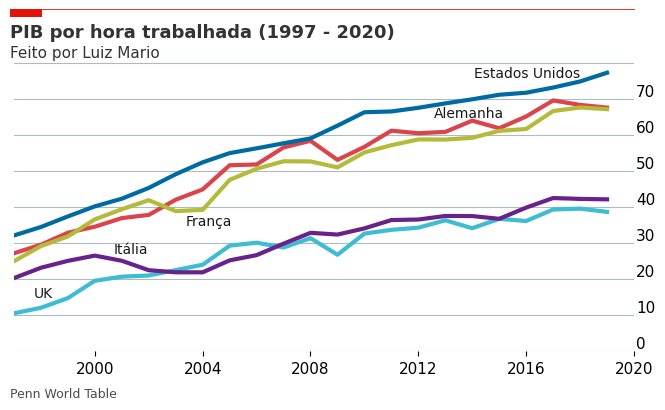

In [ ]:
#Colocando no Layout da The Economist 
# Configurando o tamanho do gráfico
fig, ax = plt.subplots(figsize=(8,4))
# Criando o grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
# Plotando os dados 
paises = ['GBR','DEU','FRA','USA','ITA']
for pais in paises:
  if pais == 'USA':
    ax.plot(data_set_pwt_produtividade[data_set_pwt_produtividade['country_id_iso_3'] == pais]['year'],
          data_set_pwt_produtividade[data_set_pwt_produtividade['country_id_iso_3'] == pais]['Produtividade'],
          color = '#006BA2',
          label = 'Estados Unidos',
          linewidth=3) #Azul
  elif pais == 'DEU':
    ax.plot(data_set_pwt_produtividade[data_set_pwt_produtividade['country_id_iso_3'] == pais]['year'],
          data_set_pwt_produtividade[data_set_pwt_produtividade['country_id_iso_3'] == pais]['Produtividade'],
          color = '#DB444B',
          label = 'Alemanha',
          linewidth=3) #Vermelho
  elif pais == 'FRA':
     ax.plot(data_set_pwt_produtividade[data_set_pwt_produtividade['country_id_iso_3'] == pais]['year'],
          data_set_pwt_produtividade[data_set_pwt_produtividade['country_id_iso_3'] == pais]['Produtividade'],
          color = '#B4BA39',
          label = 'França',
          linewidth=3) #Oliva
  elif pais == 'ITA':
    ax.plot(data_set_pwt_produtividade[data_set_pwt_produtividade['country_id_iso_3'] == pais]['year'],
          data_set_pwt_produtividade[data_set_pwt_produtividade['country_id_iso_3'] == pais]['Produtividade'],
          color = '#68228B',
          label = 'Itália',
          linewidth=3) #Roxo
  elif pais == 'GBR':
    ax.plot(data_set_pwt_produtividade[data_set_pwt_produtividade['country_id_iso_3'] == pais]['year'],
          data_set_pwt_produtividade[data_set_pwt_produtividade['country_id_iso_3'] == pais]['Produtividade'],
          color = '#3EBCD2',
          label = 'Inglaterra',
          linewidth=3) #Ciano
# Removendo os eixos
ax.set_frame_on(False)
ax.tick_params(top=False)
ax.tick_params(labeltop=False)
# Configurando um limte para o y, afim de fazermos um plot maior 
ax.set_ylim(35,77)
# Configurando o limite para x 
ax.set_xlim(pd.datetime(1997, 1, 1), pd.datetime(2020, 1, 1))
# Formando o tamanho da legenda do eixo x 
ax.xaxis.set_tick_params(labelsize=11) 
# Formando o tamanho da legenda do eixo y 
ax.set_yticklabels(np.arange(0,80,10), 
                   ha = 'left',
                   verticalalignment='bottom')
ax.yaxis.set_tick_params(pad=-2,
                         labeltop=True,
                         labelbottom=False,
                         bottom=False,
                         labelsize=11)
# Adicionando as legendas para cada um dos países 
ax.text(x=.70, y=.81, s='Estados Unidos', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.34, y=.44, s='França', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.65, y=.71, s='Alemanha', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.15, y=.26, s='UK', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.25, y=.37, s='Itália', transform=fig.transFigure, size=10, alpha=.9)
# Adicionando as linhas 
ax.plot([0.12, .9],                 
        [.98, .98],                  
        transform=fig.transFigure,  
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98),                 
                           0.04,                       
                           -0.02,                      
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))
# Adicionando título e subtítulo 
ax.text(x=0.12, y=.91, s="PIB por hora trabalhada (1997 - 2020)", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=0.12, y=.86, s="Feito por Luiz Mario", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)
# Adicionando o texto da fonte 
ax.text(x=0.12, y=0.01, s="""Penn World Table""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)

# Colocando o Brasil nessa análise 

In [9]:
# Filtrando nosso dataframe para os países primeiramente 
#Criando uma lista para filtragem com os simbolos de cada país do gráfico 
paises = ['GBR','DEU','FRA','USA','ITA','BRA']
data_set_pwt_produtividade_com_Bra = data_set_pwt[(data_set_pwt.country_id_iso_3.isin(paises))]

In [10]:
#Vizualizando 
data_set_pwt_produtividade_com_Bra

,year,country_id_iso_3,country,currency_unit,population,employees,real_gdp_expenditures,real_gdp_output,current_consumption,current_absorption,...,indicator_real_rate_return,indicator_stat_capacity,corr_exp_share,current_share_household,current_share_gcf,current_share_gov,current_share_x,current_share_m,current_share_residual_trade,current_share_labour_gdp_na
1680,1950,BRA,Brazil,Brazilian Real,5.312413e+07,1.698824e+07,9.187195e+10,8.844267e+10,6.710152e+10,8.393338e+10,...,Regular,NaN,NaN,0.653652,0.197271,0.132784,0.117741,-0.114157,0.012709,0.514606
1681,1951,BRA,Brazil,Brazilian Real,5.466733e+07,1.746181e+07,9.601211e+10,9.110038e+10,7.003782e+10,9.141694e+10,...,Regular,NaN,NaN,0.659324,0.243967,0.139909,0.134638,-0.187441,0.009603,0.514606
1682,1952,BRA,Brazil,Brazilian Real,5.626476e+07,1.795221e+07,1.049840e+11,1.007701e+11,7.626099e+10,1.008270e+11,...,Regular,NaN,NaN,0.646864,0.251008,0.132349,0.087728,-0.140368,0.022418,0.514606
1683,1953,BRA,Brazil,Brazilian Real,5.791863e+07,1.846018e+07,1.079460e+11,1.041409e+11,8.094932e+10,1.004724e+11,...,Regular,NaN,NaN,0.635268,0.192016,0.160895,0.088722,-0.091622,0.014721,0.514606
1684,1954,BRA,Brazil,Brazilian Real,5.963121e+07,1.898650e+07,1.176132e+11,1.130284e+11,8.891105e+10,1.119383e+11,...,Regular,NaN,NaN,0.665873,0.209098,0.141482,0.091111,-0.108842,0.001278,0.514606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,2015,USA,United States,US Dollar,3.208783e+08,1.502485e+08,1.890512e+13,1.878536e+13,1.519205e+13,1.947383e+13,...,Regular,NaN,1.0,0.697479,0.228047,0.111648,0.119109,-0.171910,0.015626,0.595646
12176,2016,USA,United States,US Dollar,3.230160e+08,1.523970e+08,1.928525e+13,1.909520e+13,1.560235e+13,1.976734e+13,...,Regular,NaN,1.0,0.703245,0.218102,0.113779,0.113846,-0.164109,0.015137,0.593773
12177,2017,USA,United States,US Dollar,3.250848e+08,1.546723e+08,1.975475e+13,1.954298e+13,1.601979e+13,2.031631e+13,...,Regular,NaN,1.0,0.704093,0.219850,0.115628,0.115603,-0.170726,0.015552,0.596151
12178,2018,USA,United States,US Dollar,3.270963e+08,1.566759e+08,2.036944e+13,2.015526e+13,1.643456e+13,2.093440e+13,...,Regular,NaN,NaN,0.701681,0.223556,0.114803,0.117129,-0.173503,0.016334,0.594326


In [11]:
# Como o nosso gráfico só contabiliza os anos de 1997 para frente, iremos filtrar agora por ano 
data_set_pwt_produtividade_com_Bra = data_set_pwt_produtividade_com_Bra[(data_set_pwt_produtividade_com_Bra.year >= 1997)]

In [12]:
# Filtrando o dataframe usando as mesmas colunas que o exemplo anterior
data_set_pwt_produtividade_com_Bra.drop(data_set_pwt_produtividade_com_Bra.columns.difference(['year','country_id_iso_3','real_gdp_output','average_hours_worked','employees']), 1, inplace=True)

In [13]:
# Calculando a produtividade de cada país em cada ano 
data_set_pwt_produtividade_com_Bra['Produtividade'] = data_set_pwt_produtividade_com_Bra['real_gdp_output']/(data_set_pwt_produtividade_com_Bra['employees']*data_set_pwt_produtividade_com_Bra['average_hours_worked'])
data_set_pwt_produtividade_com_Bra

,year,country_id_iso_3,employees,real_gdp_output,average_hours_worked,Produtividade
1727,1997,BRA,6.279587e+07,1.761592e+12,1845.731727,15.198671
1728,1998,BRA,6.261137e+07,1.687990e+12,1841.000000,14.644108
1729,1999,BRA,6.588960e+07,1.630692e+12,1813.842815,13.644428
1730,2000,BRA,6.813046e+07,1.653572e+12,1837.927050,13.205464
1731,2001,BRA,6.845639e+07,1.645850e+12,1828.326394,13.149900
...,...,...,...,...,...,...
12175,2015,USA,1.502485e+08,1.878536e+13,1770.023174,70.636708
12176,2016,USA,1.523970e+08,1.909520e+13,1766.744125,70.920889
12177,2017,USA,1.546723e+08,1.954298e+13,1763.726676,71.638571
12178,2018,USA,1.566759e+08,2.015526e+13,1774.703811,72.487032


In [14]:
# Transformando nossos data sets em séries temporais 
data_set_pwt_produtividade_com_Bra['year'] = pd.to_datetime(data_set_pwt_produtividade_com_Bra['year'], format='%Y')

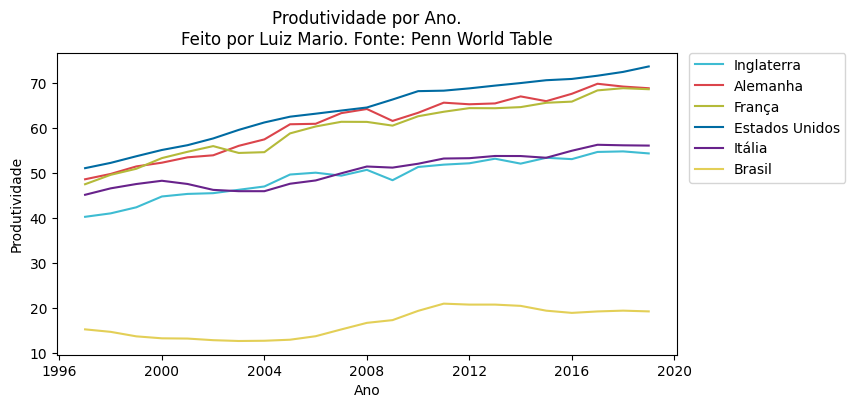

In [16]:
# Plotando o gráfico 
fig, ax = plt.subplots(figsize=(8,4))
# chamando a nossa lista de paises 
paises = ['GBR','DEU','FRA','USA','ITA','BRA']
for pais in paises:
  if pais == 'USA':
    ax.plot(data_set_pwt_produtividade_com_Bra[data_set_pwt_produtividade_com_Bra['country_id_iso_3'] == pais]['year'],
          data_set_pwt_produtividade_com_Bra[data_set_pwt_produtividade_com_Bra['country_id_iso_3'] == pais]['Produtividade'],
          color = '#006BA2',
          label = 'Estados Unidos') #Azul
  elif pais == 'DEU':
    ax.plot(data_set_pwt_produtividade_com_Bra[data_set_pwt_produtividade_com_Bra['country_id_iso_3'] == pais]['year'],
          data_set_pwt_produtividade_com_Bra[data_set_pwt_produtividade_com_Bra['country_id_iso_3'] == pais]['Produtividade'],
          color = '#DB444B',
          label = 'Alemanha') #Vermelho
  elif pais == 'FRA':
     ax.plot(data_set_pwt_produtividade_com_Bra[data_set_pwt_produtividade_com_Bra['country_id_iso_3'] == pais]['year'],
          data_set_pwt_produtividade_com_Bra[data_set_pwt_produtividade_com_Bra['country_id_iso_3'] == pais]['Produtividade'],
          color = '#B4BA39',
          label = 'França') #Oliva
  elif pais == 'ITA':
    ax.plot(data_set_pwt_produtividade_com_Bra[data_set_pwt_produtividade_com_Bra['country_id_iso_3'] == pais]['year'],
          data_set_pwt_produtividade_com_Bra[data_set_pwt_produtividade_com_Bra['country_id_iso_3'] == pais]['Produtividade'],
          color = '#68228B',
          label = 'Itália') #Roxo
  elif pais == 'GBR':
    ax.plot(data_set_pwt_produtividade_com_Bra[data_set_pwt_produtividade_com_Bra['country_id_iso_3'] == pais]['year'],
          data_set_pwt_produtividade_com_Bra[data_set_pwt_produtividade_com_Bra['country_id_iso_3'] == pais]['Produtividade'],
          color = '#3EBCD2',
          label = 'Inglaterra') #Ciano
  elif pais == 'BRA':
    ax.plot(data_set_pwt_produtividade_com_Bra[data_set_pwt_produtividade_com_Bra['country_id_iso_3'] == pais]['year'],
          data_set_pwt_produtividade_com_Bra[data_set_pwt_produtividade_com_Bra['country_id_iso_3'] == pais]['Produtividade'],
          color = '#E3CF57',
          label = 'Brasil') #Amarelo Banana
plt.ticklabel_format(style='plain', axis='y')
ax.set_ylabel("Produtividade")
ax.set_xlabel("Ano")
plt.legend(loc = 'upper left', borderaxespad = 0,bbox_to_anchor=(1.02, 1))
plt.title("Produtividade por Ano.\nFeito por Luiz Mario. Fonte: Penn World Table", loc='center')     
plt.show()

Text(0.12, 0.01, 'Penn World Table')

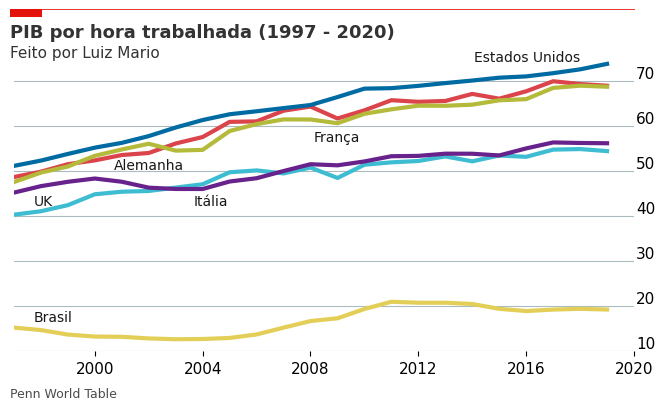

In [54]:
#Colocando no Layout da The Economist 
# Configurando o tamanho do gráfico
fig, ax = plt.subplots(figsize=(8,4))
# Criando o grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
# Plotando os dados 
paises = ['GBR','DEU','FRA','USA','ITA','BRA']
for pais in paises:
  if pais == 'USA':
    ax.plot(data_set_pwt_produtividade_com_Bra[data_set_pwt_produtividade_com_Bra['country_id_iso_3'] == pais]['year'],
          data_set_pwt_produtividade_com_Bra[data_set_pwt_produtividade_com_Bra['country_id_iso_3'] == pais]['Produtividade'],
          color = '#006BA2',
          linewidth = 3) #Azul
  elif pais == 'DEU':
    ax.plot(data_set_pwt_produtividade_com_Bra[data_set_pwt_produtividade_com_Bra['country_id_iso_3'] == pais]['year'],
          data_set_pwt_produtividade_com_Bra[data_set_pwt_produtividade_com_Bra['country_id_iso_3'] == pais]['Produtividade'],
          color = '#DB444B',
          linewidth = 3) #Vermelho
  elif pais == 'FRA':
     ax.plot(data_set_pwt_produtividade_com_Bra[data_set_pwt_produtividade_com_Bra['country_id_iso_3'] == pais]['year'],
          data_set_pwt_produtividade_com_Bra[data_set_pwt_produtividade_com_Bra['country_id_iso_3'] == pais]['Produtividade'],
          color = '#B4BA39',
          linewidth = 3) #Oliva
  elif pais == 'ITA':
    ax.plot(data_set_pwt_produtividade_com_Bra[data_set_pwt_produtividade_com_Bra['country_id_iso_3'] == pais]['year'],
          data_set_pwt_produtividade_com_Bra[data_set_pwt_produtividade_com_Bra['country_id_iso_3'] == pais]['Produtividade'],
          color = '#68228B',
          linewidth = 3) #Roxo
  elif pais == 'GBR':
    ax.plot(data_set_pwt_produtividade_com_Bra[data_set_pwt_produtividade_com_Bra['country_id_iso_3'] == pais]['year'],
          data_set_pwt_produtividade_com_Bra[data_set_pwt_produtividade_com_Bra['country_id_iso_3'] == pais]['Produtividade'],
          color = '#3EBCD2',
          linewidth = 3) #Ciano
  elif pais == 'BRA':
    ax.plot(data_set_pwt_produtividade_com_Bra[data_set_pwt_produtividade_com_Bra['country_id_iso_3'] == pais]['year'],
          data_set_pwt_produtividade_com_Bra[data_set_pwt_produtividade_com_Bra['country_id_iso_3'] == pais]['Produtividade'],
          color = '#E3CF57',
          linewidth = 3) #Amarelo Banana
# Removendo os eixos
ax.set_frame_on(False)
ax.tick_params(top=False)
ax.tick_params(labeltop=False)
# Configurando um limte para o y, afim de fazermos um plot maior 
ax.set_ylim(10,77)
# Configurando o limite para x 
ax.set_xlim(pd.datetime(1997, 1, 1), pd.datetime(2020, 1, 1))
# Formando o tamanho da legenda do eixo x 
ax.xaxis.set_tick_params(labelsize=11) 
# Formando o tamanho da legenda do eixo y 
ax.set_yticklabels(np.arange(10,80,10), 
                   ha = 'left',
                   verticalalignment='bottom')
ax.yaxis.set_tick_params(pad=-2,
                         labeltop=True,
                         labelbottom=False,
                         bottom=False,
                         labelsize=11)
# Adicionando as legendas para cada um dos países 
ax.text(x=.70, y=.85, s='Estados Unidos', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.50, y=.65, s='França', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.25, y=.58, s='Alemanha', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.15, y=.49, s='UK', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.35, y=.49, s='Itália', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.15, y=.20, s='Brasil', transform=fig.transFigure, size=10, alpha=.9)
# Adicionando as linhas 
ax.plot([0.12, .9],                 
        [.98, .98],                  
        transform=fig.transFigure,  
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98),                 
                           0.04,                       
                           -0.02,                      
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))
# Adicionando título e subtítulo 
ax.text(x=0.12, y=.91, s="PIB por hora trabalhada (1997 - 2020)", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=0.12, y=.86, s="Feito por Luiz Mario", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)
# Adicionando o texto da fonte 
ax.text(x=0.12, y=0.01, s="""Penn World Table""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)

# Podemos também utilizar a base de dados para verificar variáveis e correlações entre elas. Como por exemplo verificar a relação entre PIB per Capita e a porcentagem de população empregada 

In [23]:
data_set_pwt

,year,country_id_iso_3,country,currency_unit,population,employees,real_gdp_expenditures,real_gdp_output,current_consumption,current_absorption,...,indicator_real_rate_return,indicator_stat_capacity,corr_exp_share,current_share_household,current_share_gcf,current_share_gov,current_share_x,current_share_m,current_share_residual_trade,current_share_labour_gdp_na
0,1950,ABW,Aruba,Aruban Guilder,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1951,ABW,Aruba,Aruban Guilder,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1952,ABW,Aruba,Aruban Guilder,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1953,ABW,Aruba,Aruban Guilder,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954,ABW,Aruba,Aruban Guilder,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12805,2015,ZWE,Zimbabwe,US Dollar,13814629.0,6.393752e+06,4.014162e+10,3.979864e+10,4.424936e+10,4.732546e+10,...,Regular,62.222200,0.306506,0.945086,0.077963,0.176403,0.140172,-0.287693,-0.051930,0.533381
12806,2016,ZWE,Zimbabwe,US Dollar,14030331.0,6.504374e+06,4.187520e+10,4.096319e+10,4.329157e+10,4.640416e+10,...,Regular,55.555533,0.302841,0.890514,0.076169,0.168887,0.131920,-0.251232,-0.016258,0.533381
12807,2017,ZWE,Zimbabwe,US Dollar,14236595.0,6.611773e+06,4.467218e+10,4.431674e+10,4.611395e+10,4.945757e+10,...,Regular,59.999967,0.301868,0.833453,0.075448,0.207101,0.126722,-0.202827,-0.039897,0.533381
12808,2018,ZWE,Zimbabwe,US Dollar,14438802.0,6.714952e+06,4.432511e+10,4.342090e+10,4.619844e+10,4.966539e+10,...,Regular,59.999967,NaN,0.790588,0.079576,0.269799,0.144485,-0.263658,-0.020791,0.533381


In [24]:
#Filtrando para o ano mais recente 
data_set_pwt_dispersao = data_set_pwt[(data_set_pwt.year == 2019)]

In [25]:
# Vizualizando o data set
data_set_pwt_dispersao

,year,country_id_iso_3,country,currency_unit,population,employees,real_gdp_expenditures,real_gdp_output,current_consumption,current_absorption,...,indicator_real_rate_return,indicator_stat_capacity,corr_exp_share,current_share_household,current_share_gcf,current_share_gov,current_share_x,current_share_m,current_share_residual_trade,current_share_labour_gdp_na
69,2019,ABW,Aruba,Aruban Guilder,106314.0,4.760089e+04,3.921261e+09,3.467300e+09,3.023695e+09,3.877660e+09,...,Regular,NaN,NaN,0.658242,0.246366,0.214084,0.973115,-1.091808,2.125691e-07,0.645106
139,2019,AGO,Angola,Kwanza,31825295.0,1.664496e+07,2.281510e+11,2.278557e+11,1.559437e+11,1.987504e+11,...,Regular,48.888900,NaN,0.498670,0.191710,0.199723,0.344351,-0.113983,-1.204703e-01,0.331142
209,2019,AIA,Anguilla,East Caribbean Dollar,14869.0,NaN,3.766350e+08,2.256805e+08,4.384700e+08,5.090450e+08,...,None,NaN,NaN,1.513381,0.292376,0.303098,1.480300,-2.445801,-1.433542e-01,NaN
279,2019,ALB,Albania,Lek,2880917.0,1.075898e+06,3.589002e+10,3.610304e+10,3.339917e+10,4.086832e+10,...,None,78.888900,NaN,0.714312,0.205828,0.206071,0.126594,-0.313949,6.114468e-02,NaN
349,2019,ARE,United Arab Emirates,UAE Dirham,9770529.0,5.808834e+06,6.815258e+11,6.459562e+11,3.067712e+11,5.156233e+11,...,None,NaN,NaN,0.355746,0.328729,0.127105,0.889652,-0.701231,-4.849206e-07,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12529,2019,VNM,Viet Nam,Dong,96462106.0,5.039956e+07,7.507268e+11,7.241234e+11,5.826771e+11,7.588219e+11,...,None,78.888900,NaN,0.710267,0.243582,0.095490,0.526032,-0.518066,-5.730492e-02,NaN
12599,2019,YEM,Yemen,Yemeni Rial,29161922.0,5.531877e+06,5.005293e+10,5.182806e+10,4.926647e+10,6.799253e+10,...,None,38.888867,NaN,0.647500,0.360231,0.300234,0.000723,-0.135297,-1.733917e-01,NaN
12669,2019,ZAF,South Africa,Rand,58558270.0,1.864271e+07,7.489400e+11,7.340944e+11,6.236696e+11,7.416759e+11,...,Regular,75.555567,NaN,0.621124,0.160538,0.227329,0.184207,-0.198112,4.914912e-03,0.570888
12739,2019,ZMB,Zambia,Kwacha,17861030.0,5.225448e+06,5.795618e+10,5.678371e+10,3.869840e+10,5.653686e+10,...,Regular,55.555567,NaN,0.509846,0.313996,0.171331,0.215397,-0.238961,2.839118e-02,0.390301


In [26]:
#Filtrando para termos somente as colunas necessárias 
data_set_pwt_dispersao.drop(data_set_pwt_dispersao.columns.difference(['year','country_id_iso_3','real_gdp_output','average_hours_worked','employees','population']), 1, inplace=True)

In [27]:
data_set_pwt_dispersao

,year,country_id_iso_3,population,employees,real_gdp_output,average_hours_worked
69,2019,ABW,106314.0,4.760089e+04,3.467300e+09,NaN
139,2019,AGO,31825295.0,1.664496e+07,2.278557e+11,NaN
209,2019,AIA,14869.0,NaN,2.256805e+08,NaN
279,2019,ALB,2880917.0,1.075898e+06,3.610304e+10,NaN
349,2019,ARE,9770529.0,5.808834e+06,6.459562e+11,NaN
...,...,...,...,...,...,...
12529,2019,VNM,96462106.0,5.039956e+07,7.241234e+11,2131.968232
12599,2019,YEM,29161922.0,5.531877e+06,5.182806e+10,NaN
12669,2019,ZAF,58558270.0,1.864271e+07,7.340944e+11,2191.363362
12739,2019,ZMB,17861030.0,5.225448e+06,5.678371e+10,NaN


In [28]:
#Limpando manualmente e retirando as linhas que possuem NaNs
data_set_pwt_dispersao.drop([209,559,3429,6509,11199,10989], axis=0, inplace=True)

In [30]:
data_set_pwt_dispersao

,year,country_id_iso_3,population,employees,real_gdp_output,average_hours_worked
69,2019,ABW,106314.0,4.760089e+04,3.467300e+09,NaN
139,2019,AGO,31825295.0,1.664496e+07,2.278557e+11,NaN
279,2019,ALB,2880917.0,1.075898e+06,3.610304e+10,NaN
349,2019,ARE,9770529.0,5.808834e+06,6.459562e+11,NaN
419,2019,ARG,44780677.0,2.064322e+07,9.774206e+11,1609.068998
...,...,...,...,...,...,...
12529,2019,VNM,96462106.0,5.039956e+07,7.241234e+11,2131.968232
12599,2019,YEM,29161922.0,5.531877e+06,5.182806e+10,NaN
12669,2019,ZAF,58558270.0,1.864271e+07,7.340944e+11,2191.363362
12739,2019,ZMB,17861030.0,5.225448e+06,5.678371e+10,NaN


In [31]:
#Calculando o PIB per Capita e a porcentagem de empregados/população 
data_set_pwt_dispersao['PIB per Capita'] = data_set_pwt_dispersao['real_gdp_output']/data_set_pwt_dispersao['population']
data_set_pwt_dispersao['Empregados/População'] = data_set_pwt_dispersao['employees']/data_set_pwt_dispersao['population']

In [32]:
data_set_pwt_dispersao

,year,country_id_iso_3,population,employees,real_gdp_output,average_hours_worked,PIB per Capita,Empregados/População
69,2019,ABW,106314.0,4.760089e+04,3.467300e+09,NaN,32613.762633,0.447739
139,2019,AGO,31825295.0,1.664496e+07,2.278557e+11,NaN,7159.579157,0.523010
279,2019,ALB,2880917.0,1.075898e+06,3.610304e+10,NaN,12531.788652,0.373457
349,2019,ARE,9770529.0,5.808834e+06,6.459562e+11,NaN,66112.720202,0.594526
419,2019,ARG,44780677.0,2.064322e+07,9.774206e+11,1609.068998,21826.837555,0.460985
...,...,...,...,...,...,...,...,...
12529,2019,VNM,96462106.0,5.039956e+07,7.241234e+11,2131.968232,7506.816977,0.522480
12599,2019,YEM,29161922.0,5.531877e+06,5.182806e+10,NaN,1777.251122,0.189695
12669,2019,ZAF,58558270.0,1.864271e+07,7.340944e+11,2191.363362,12536.134947,0.318362
12739,2019,ZMB,17861030.0,5.225448e+06,5.678371e+10,NaN,3179.195984,0.292561


In [33]:
#Agora iremos criar uma lista de países para facilitar o nosso plot, pois queremos destacar alguns 
paises = [] #Lista vazia
#Com um loop for fazemos o mapeamento
for pais in data_set_pwt_dispersao['country_id_iso_3']:
    if pais not in paises:
        paises.append(pais)
print(paises)

['ABW', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GTM', 'GUY', 'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LCA', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MDA', 'MDG', 'MDV', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MOZ', 'MRT', 'MSR', 'MUS', 'MWI', 'MYS', 'NAM', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY', 'PSE', 'QAT', 'ROU', 'RUS', 'RWA', 'SAU', 'SDN', 'SEN', 'SGP'

Text(0.5, 1.0, 'PIB per Capita por Porcentagem de Empregados.\nFeito por Luiz Mario. Fonte: Banco Mundial e Penn World Table')

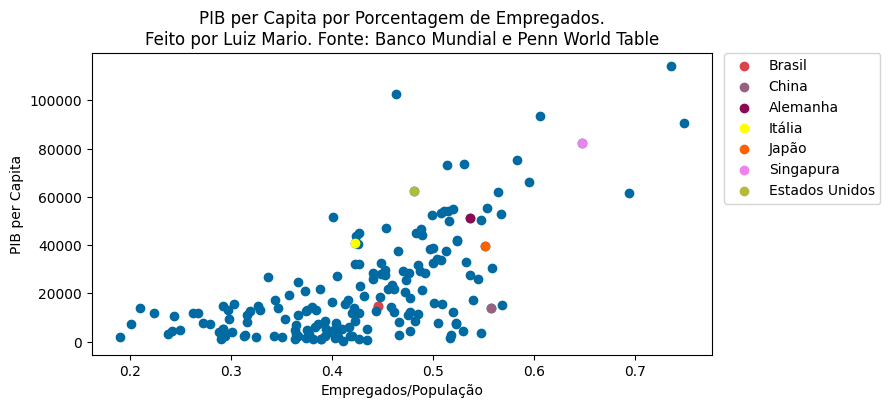

In [54]:
# Fazendo o gráfico de dispersão 
fig, ax = plt.subplots(figsize=(8,4))
# Plotando os dados de acordo com a lista 
for pais in paises:
    ax.scatter(data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['Empregados/População'], 
        data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['PIB per Capita'], 
        color='#006BA2') #Azul
    if pais == 'BRA':
        ax.scatter(data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['Empregados/População'], 
        data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['PIB per Capita'], 
        color='#DB444B',
        label = 'Brasil') #Vermelho
    elif pais == 'USA':
        ax.scatter(data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['Empregados/População'], 
        data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['PIB per Capita'], 
        color='#B4BA39',
        label = 'Estados Unidos') #Oliva
    elif pais == 'CHN':
        ax.scatter(data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['Empregados/População'], 
        data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['PIB per Capita'], 
        color='#9A607F',
        label ='China') #Roxo
    elif pais == 'DEU':
        ax.scatter(data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['Empregados/População'], 
        data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['PIB per Capita'], 
        color='#8B0A50',
        label = 'Alemanha') #Rosa Escuro
    elif pais == 'JPN':
        ax.scatter(data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['Empregados/População'], 
        data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['PIB per Capita'], 
        color='#FF6103',
        label = 'Japão') #Laranja
    elif pais == 'ITA':
        ax.scatter(data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['Empregados/População'], 
        data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['PIB per Capita'], 
        color='#FFFF00',
        label = 'Itália') #Amarelo
    elif pais == 'SGP':
        ax.scatter(data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['Empregados/População'], 
        data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['PIB per Capita'], 
        color='#EE82EE',
        label = 'Singapura') #Violeta
ax.set_ylabel("PIB per Capita")
ax.set_xlabel("Empregados/População")
plt.legend(loc = 'upper left', borderaxespad = 0,bbox_to_anchor=(1.02, 1))
plt.title("PIB per Capita por Porcentagem de Empregados.\nFeito por Luiz Mario. Fonte:Penn World Table", loc='center')        

Text(0.5, 1.0, 'PIB per Capita por Porcentagem de Empregados.\nFeito por Luiz Mario. Fonte:Penn World Table')

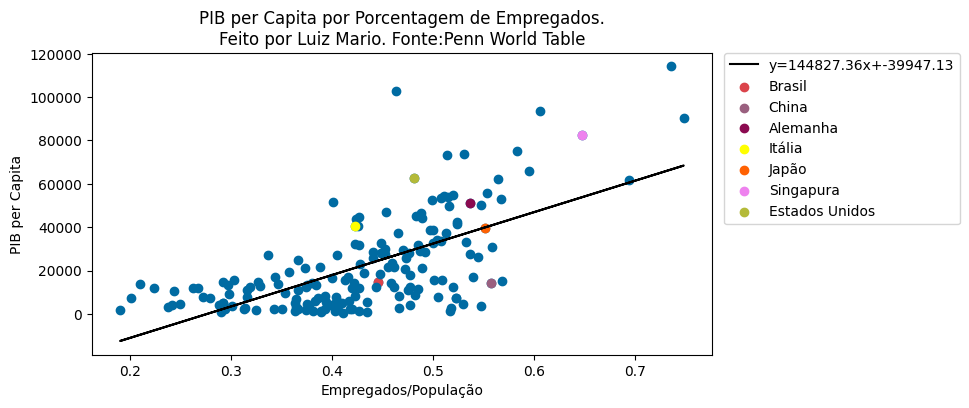

In [57]:
#Gerando o gráfico com a regressão 
# Fazendo o gráfico de dispersão 
fig, ax = plt.subplots(figsize=(8,4))
# Plotando os dados de acordo com a lista 
for pais in paises:
    ax.scatter(data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['Empregados/População'], 
        data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['PIB per Capita'], 
        color='#006BA2') #Azul
    if pais == 'BRA':
        ax.scatter(data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['Empregados/População'], 
        data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['PIB per Capita'], 
        color='#DB444B',
        label = 'Brasil') #Vermelho
    elif pais == 'USA':
        ax.scatter(data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['Empregados/População'], 
        data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['PIB per Capita'], 
        color='#B4BA39',
        label = 'Estados Unidos') #Oliva
    elif pais == 'CHN':
        ax.scatter(data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['Empregados/População'], 
        data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['PIB per Capita'], 
        color='#9A607F',
        label ='China') #Roxo
    elif pais == 'DEU':
        ax.scatter(data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['Empregados/População'], 
        data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['PIB per Capita'], 
        color='#8B0A50',
        label = 'Alemanha') #Rosa Escuro
    elif pais == 'JPN':
        ax.scatter(data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['Empregados/População'], 
        data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['PIB per Capita'], 
        color='#FF6103',
        label = 'Japão') #Laranja
    elif pais == 'ITA':
        ax.scatter(data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['Empregados/População'], 
        data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['PIB per Capita'], 
        color='#FFFF00',
        label = 'Itália') #Amarelo
    elif pais == 'SGP':
        ax.scatter(data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['Empregados/População'], 
        data_set_pwt_dispersao[data_set_pwt_dispersao['country_id_iso_3'] == pais]['PIB per Capita'], 
        color='#EE82EE',
        label = 'Singapura') #Violeta
# Definindo parâmetros x e y
x = data_set_pwt_dispersao['Empregados/População']
y = data_set_pwt_dispersao['PIB per Capita']
regressao_paises = slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, 'black', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend(fontsize=9)
ax.set_ylabel("PIB per Capita")
ax.set_xlabel("Empregados/População")
plt.legend(loc = 'upper left', borderaxespad = 0,bbox_to_anchor=(1.02, 1))
plt.title("PIB per Capita por Porcentagem de Empregados.\nFeito por Luiz Mario. Fonte:Penn World Table", loc='center')        

# Coletar os dados da regressão são interessantes para tirarmos conclusões sobre a relação entre as variáveis. Porém nesse caso, temos que levar em consideração que o PIB per Capita e as taxas de Empregados/População dependem do tempo anterior. Por isso é necessário elaborar um modelo mais preciso levando em conta essas outras variáveis. 


In [59]:
# Gerando os dados dessa regressão com o Scipy 
# Dados da regressão
x = data_set_pwt_dispersao['Empregados/População'].tolist() #precisamos transformar nossos dados em lista
y = data_set_pwt_dispersao['PIB per Capita'].tolist()
# Adicionando o termo constante 
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     127.0
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           1.70e-22
Time:                        14:33:56   Log-Likelihood:                -1971.9
No. Observations:                 177   AIC:                             3948.
Df Residuals:                     175   BIC:                             3954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.995e+04   5652.306     -7.067      0.0